In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# data preprocessing

gen = pd.read_csv('./genetic_disorders.csv')
gen.head()

#drop na
na_count = gen.isna().sum()

gen_clean = gen.dropna()
print(gen_clean.shape)

#before cleaning shape (22083, 45)
#after cleaning shape (5307, 45)

# print(gen_clean.columns)

#has PII and irrelevant data 

gen_clean = gen_clean.drop(columns = ['Patient Id', 'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Place of birth', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5' ])

#verifying column names and NAs
print(gen_clean.columns)
print(gen_clean.isna().sum())  #all clean



(5307, 45)
Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Genetic Disorder',
       'Disorder Subclass'],
      dtype='object')
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                      

In [7]:
gen_clean.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Genetic Disorder,Disorder Subclass
8,11.0,No,No,Yes,No,5.209058,45.0,44.0,Alive,Tachypnea,...,Yes,No,No,No,Yes,0.0,Multiple,6.669552,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,4.0,No,Yes,Yes,Yes,4.752272,44.0,42.0,Alive,Tachypnea,...,No,No,No,Yes,Yes,1.0,Multiple,6.397702,Multifactorial genetic inheritance disorders,Diabetes
14,6.0,Yes,No,Yes,No,4.620420,41.0,20.0,Alive,Tachypnea,...,Yes,Yes,-,No,No,3.0,Multiple,3.000000,Mitochondrial genetic inheritance disorders,Leigh syndrome
18,10.0,Yes,Yes,Yes,No,4.751452,40.0,57.0,Deceased,Normal (30-60),...,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
19,6.0,No,Yes,Yes,Yes,4.876896,36.0,48.0,Deceased,Tachypnea,...,Yes,No,No,Yes,No,1.0,Singular,7.370477,Single-gene inheritance diseases,Hemochromatosis


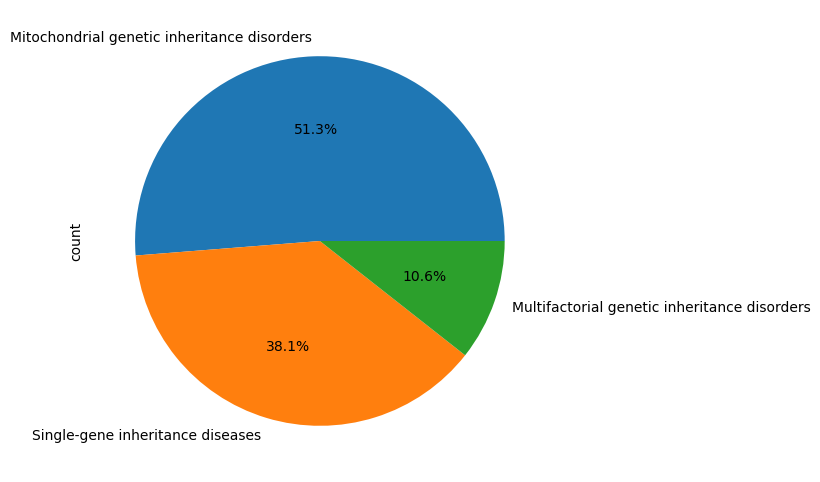

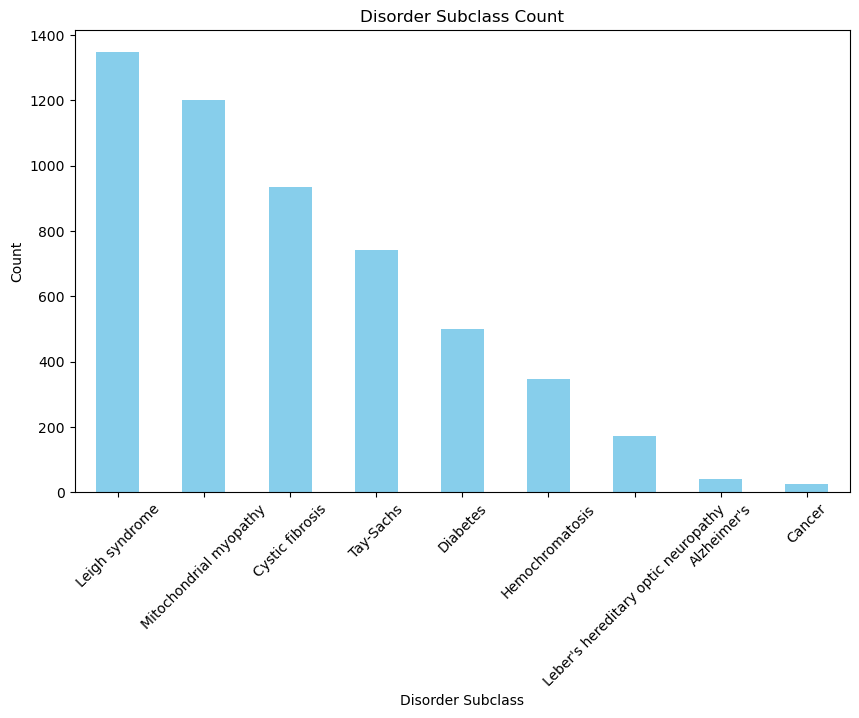

In [3]:

#data analysis
disorder_count = gen_clean['Genetic Disorder'].value_counts()

#plot
disorder_count.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.show()

# plot subclass of disorders
subclass_count = gen_clean['Disorder Subclass'].value_counts()
plt.figure(figsize=(10, 6))
subclass_count.plot(kind= 'bar', width= 0.5, color= 'skyblue')
plt.title('Disorder Subclass Count')
plt.xlabel('Disorder Subclass')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

Disorder Subclass  Alzheimer's   Cancer  Cystic fibrosis  Diabetes  \
Maternal gene                                                        
No                    0.002583  0.00904          0.13517  0.068876   
Yes                   0.011059  0.00134          0.20811  0.113606   

Disorder Subclass  Hemochromatosis  Leber's hereditary optic neuropathy  \
Maternal gene                                                             
No                        0.092553                             0.017219   
Yes                       0.044571                             0.044236   

Disorder Subclass  Leigh syndrome  Mitochondrial myopathy  Tay-Sachs  
Maternal gene                                                         
No                       0.241498                0.256134   0.176926  
Yes                      0.263405                0.203083   0.110590  
Disorder Subclass  Alzheimer's    Cancer  Cystic fibrosis  Diabetes  \
Paternal gene                                                  

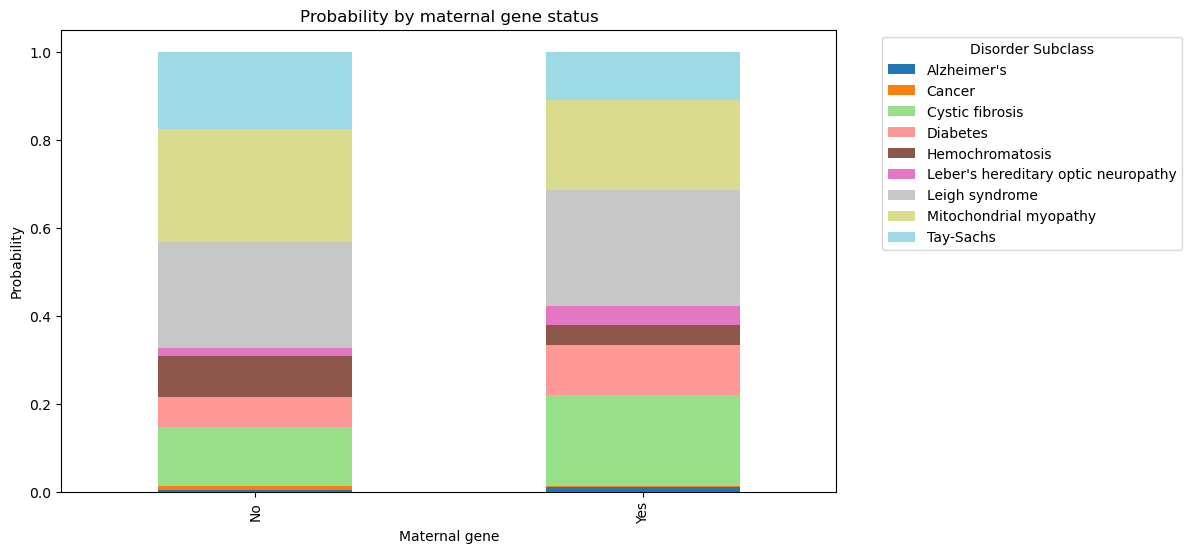

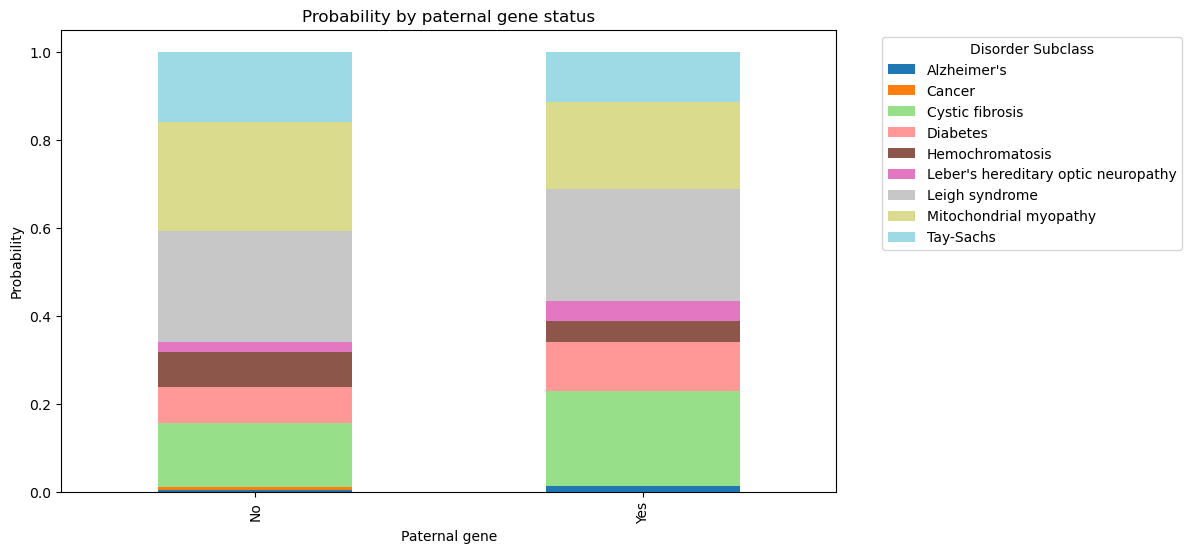

In [4]:

# Probability 

#probability of a disorder given the maternal gene influence
probability_maternal = gen_clean.groupby('Maternal gene')['Disorder Subclass'].value_counts(normalize=True).unstack()
print(probability_maternal)


#probability of a disorder given paternal gene influence
probability_paternal = gen_clean.groupby('Paternal gene')['Disorder Subclass'].value_counts(normalize=True).unstack()
print(probability_paternal)


#plots
probability_maternal.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='tab20')
plt.title('Probability by maternal gene status')
plt.xlabel('Maternal gene')
plt.ylabel('Probability')
plt.legend(title='Disorder Subclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

probability_paternal.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='tab20')
plt.title('Probability by paternal gene status')
plt.xlabel('Paternal gene')
plt.ylabel('Probability')
plt.legend(title='Disorder Subclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




In [35]:
#Conditional Probability
gen_clean['Genetic Disorder'].value_counts(normalize=True)



Genetic Disorder
Mitochondrial genetic inheritance disorders     0.512531
Single-gene inheritance diseases                0.381383
Multifactorial genetic inheritance disorders    0.106086
Name: proportion, dtype: float64

In [42]:
gen_clean['Respiratory Rate (breaths/min)'].value_counts(normalize=True)


Respiratory Rate (breaths/min)
Tachypnea         0.50782
Normal (30-60)    0.49218
Name: proportion, dtype: float64

In [58]:
respiratory_rate_count = gen_clean['Respiratory Rate (breaths/min)'].value_counts()  # counts of each respiratory rate
total_count = len(gen_clean)  
P_respiratory_rate = respiratory_rate_count / total_count  

# 2. Calculate joint probabilities (P(Disorder and Respiratory Rate))
joint_probabilities = gen_clean.groupby(['Genetic Disorder', 'Respiratory Rate (breaths/min)']).size() / total_count

# 3. Calculate conditional probabilities P(Disorder | Respiratory Rate)
#  P(Disorder | Respiratory Rate) = P(Disorder and Respiratory Rate) / P(Respiratory Rate)
conditional_probabilities = joint_probabilities / P_respiratory_rate


print("\nConditional probabilities (P(Disorder | Respiratory Rate)):")
print(conditional_probabilities)


Conditional probabilities (P(Disorder | Respiratory Rate)):
Genetic Disorder                              Respiratory Rate (breaths/min)
Mitochondrial genetic inheritance disorders   Normal (30-60)                    0.518377
                                              Tachypnea                         0.506865
Multifactorial genetic inheritance disorders  Normal (30-60)                    0.104135
                                              Tachypnea                         0.107978
Single-gene inheritance diseases              Normal (30-60)                    0.377489
                                              Tachypnea                         0.385158
dtype: float64


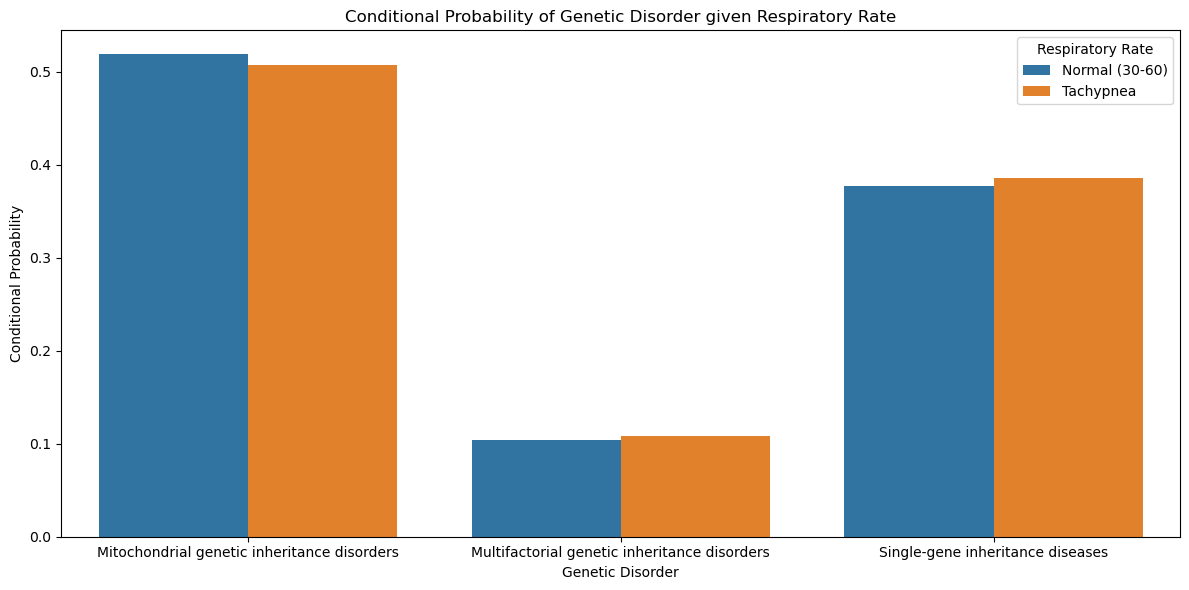

In [57]:
# Prepare data for visualization
# Create DataFrames for joint and conditional probabilities


data_conditional = {
    'Genetic Disorder': conditional_probabilities.index.get_level_values(0),
    'Respiratory Rate': conditional_probabilities.index.get_level_values(1),
    'Conditional Probability': conditional_probabilities.values
}

# Convert to DataFrame
df_conditional = pd.DataFrame(data_conditional)

# Create subplots for visualizations
fig = plt.figure(figsize=(12, 6))


# Plot conditional probabilities
sns.barplot(x='Genetic Disorder', y='Conditional Probability', hue='Respiratory Rate', data=df_conditional)
plt.title('Conditional Probability of Genetic Disorder given Respiratory Rate')


plt.tight_layout()
plt.show()

In [38]:
#Summary
"""
 Mitochondrial genetic inheritance disorders are more likely to be associated with either normal or tachypneic respiratory rates, with a slightly higher chance of occurring with normal respiratory rates.
 Single-gene inheritance diseases show similar trends, but with a slightly stronger association with tachypnea.
 Multifactorial genetic inheritance disorders are less commonly linked with either respiratory state, with only a marginal increase in likelihood for tachypnea compared to normal respiratory rates.
 Tachypnea is generally more common than normal respiratory rates across the genetic disorders studied, particularly in the case of Mitochondrial genetic inheritance disorders and Single-gene inheritance diseases.

"""

'\n Mitochondrial genetic inheritance disorders are more likely to be associated with either normal or tachypneic respiratory rates, with a slightly higher chance of occurring with normal respiratory rates.\n Single-gene inheritance diseases show similar trends, but with a slightly stronger association with tachypnea.\n Multifactorial genetic inheritance disorders are less commonly linked with either respiratory state, with only a marginal increase in likelihood for tachypnea compared to normal respiratory rates.\n Tachypnea is generally more common than normal respiratory rates across the genetic disorders studied, particularly in the case of Mitochondrial genetic inheritance disorders and Single-gene inheritance diseases.\n\n'

In [39]:
gen_clean['Disorder Subclass'].value_counts(normalize=True)

Disorder Subclass
Leigh syndrome                         0.253816
Mitochondrial myopathy                 0.226305
Cystic fibrosis                        0.176182
Tay-Sachs                              0.139627
Diabetes                               0.094027
Hemochromatosis                        0.065574
Leber's hereditary optic neuropathy    0.032410
Alzheimer's                            0.007349
Cancer                                 0.004711
Name: proportion, dtype: float64

In [44]:
gen_clean['H/O radiation exposure (x-ray)'].value_counts()  # counts of each radiation exposure type


H/O radiation exposure (x-ray)
No                1382
Not applicable    1354
-                 1294
Yes               1277
Name: count, dtype: int64

In [45]:
# Calculate the probability of each radiation exposure type
radiation_exposure = gen_clean['H/O radiation exposure (x-ray)'].value_counts()  # counts of each radiation exposure type
total_count = len(gen_clean)  
P_radiation_exposure = radiation_exposure / total_count  # renaming to reflect correct context

# Calculate joint probabilities (P(Disorder Subclass and Radiation Exposure))
joint_probabilities = gen_clean.groupby(['Disorder Subclass', 'H/O radiation exposure (x-ray)']).size() / total_count

# Calculate conditional probabilities P(Disorder Subclass | Radiation Exposure)
# P(Disorder Subclass | Radiation Exposure) = P(Disorder Subclass and Radiation Exposure) / P(Radiation Exposure)
conditional_probabilities = joint_probabilities / P_radiation_exposure


print("\nConditional probabilities (P(Disorder Subclass | Radiation Exposure)):")
print(conditional_probabilities)



Conditional probabilities (P(Disorder Subclass | Radiation Exposure)):
Disorder Subclass                    H/O radiation exposure (x-ray)
Alzheimer's                          -                                 0.005410
                                     No                                0.008683
                                     Not applicable                    0.003693
                                     Yes                               0.011746
Cancer                               -                                 0.005410
                                     No                                0.003618
                                     Not applicable                    0.006647
                                     Yes                               0.003132
Cystic fibrosis                      -                                 0.170015
                                     No                                0.174385
                                     Not applicable         

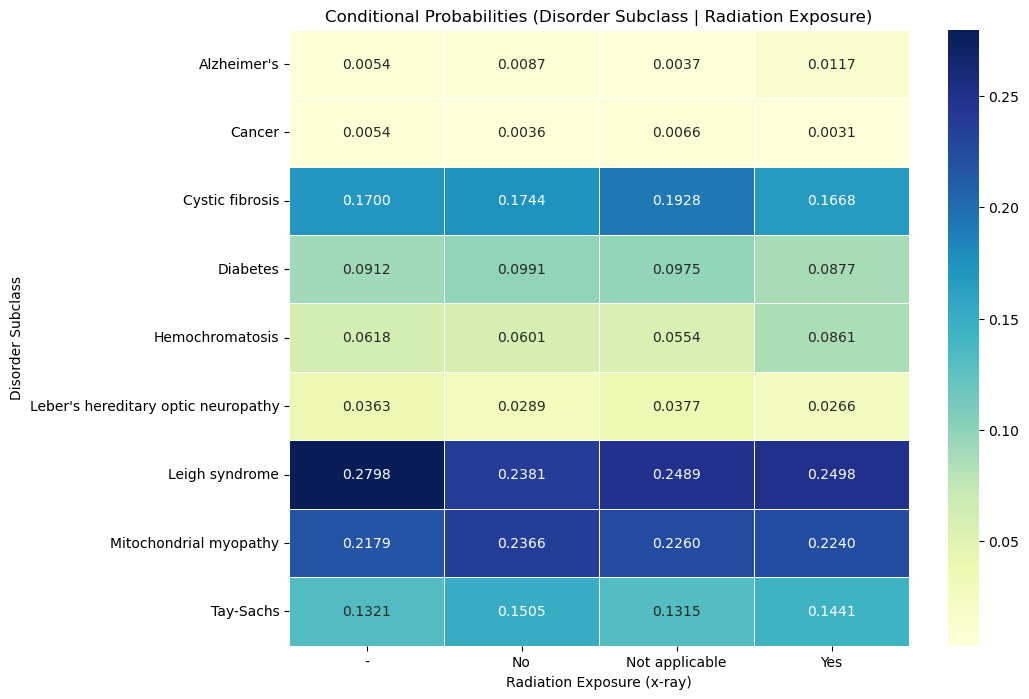

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the conditional probabilities to create a pivot table
conditional_heatmap_data = conditional_probabilities.unstack(level='H/O radiation exposure (x-ray)')

# Plot the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size based on your data
sns.heatmap(conditional_heatmap_data, annot=True, cmap="YlGnBu", fmt=".4f", linewidths=0.5)

# Adding labels and title
plt.title('Conditional Probabilities (Disorder Subclass | Radiation Exposure)')
plt.xlabel('Radiation Exposure (x-ray)')
plt.ylabel('Disorder Subclass')

# Show the plot
plt.show()

#Not applicable - not relevant
# - Missing